![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df = pd.get_dummies(penguins_df, dtype='int')
print(penguins_df.shape[0])
print(penguins_df.head())
columns = list(penguins_df.columns)
variances = []

for column in columns:
    variances.append(penguins_df[column].var())
variances_series = pd.DataFrame(variances, index=columns, columns=['Variance'])
print(variances_series)


332
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0              39.1             18.7              181.0       3750.0   
1              39.5             17.4              186.0       3800.0   
2              40.3             18.0              195.0       3250.0   
3              36.7             19.3              193.0       3450.0   
4              39.3             20.6              190.0       3650.0   

   sex_FEMALE  sex_MALE  
0           0         1  
1           1         0  
2           1         0  
3           1         0  
4           0         1  
                        Variance
culmen_length_mm       29.729343
culmen_depth_mm         3.842680
flipper_length_mm     197.008481
body_mass_g        650218.509992
sex_FEMALE              0.250746
sex_MALE                0.250746


In [2]:
inertias = {}
X = StandardScaler().fit_transform(penguins_df.values)
models = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k).fit(X)
    inertias[str(k)] = kmeans.inertia_
    models.append(kmeans)
inertias_df = pd.DataFrame(inertias.values(), index=inertias.keys(), columns=['inertia',])

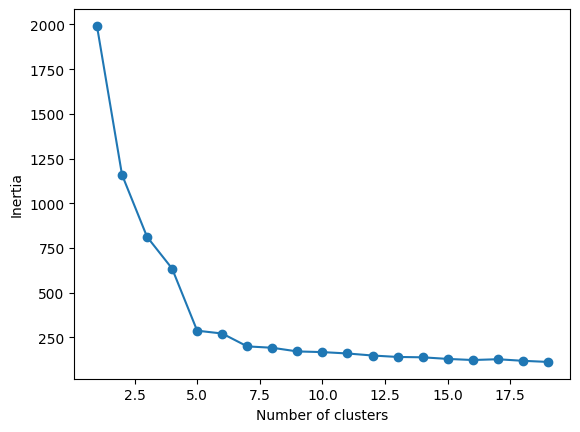

In [3]:
plt.plot(range(1, 20), inertias.values(), marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

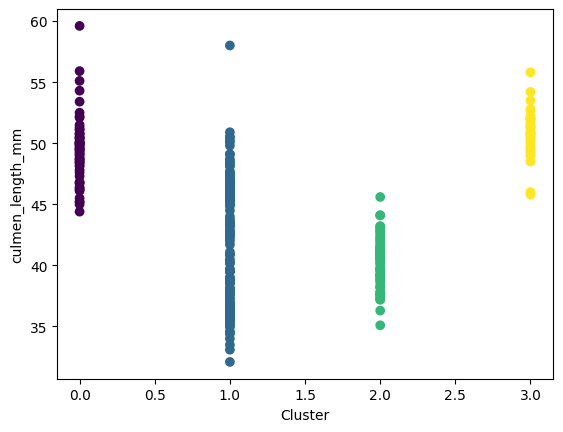

In [4]:
n_clusters = 4
model = models[n_clusters-1]
penguins_df['label'] = model.labels_
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=model.labels_)
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.show()


In [5]:
stat_penguins = penguins_df.groupby('label')[[
    'culmen_length_mm', 'culmen_depth_mm',
    'flipper_length_mm', 'label'
]].mean()

In [6]:
print(stat_penguins)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  label
label                                                             
0             49.473770        15.718033         221.540984    0.0
1             42.096970        16.425455         197.363636    1.0
2             40.315714        19.011429         192.242857    2.0
3             50.805556        19.305556         199.666667    3.0
